In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import scipy.interpolate as sci
from scipy import signal
from datetime import datetime, timedelta

In [3]:
%matplotlib nbagg

In [4]:
epoch = datetime(1, 1, 1)

## Hour Resolution Data

In [23]:
all_hour = np.loadtxt("Data/AllStations_temperature_hour_data_2019.dat")

In [24]:
longitudes = all_hour[0][1:]
latitudes = all_hour[1][1:]

coordinates = []

for i in range(len(longitudes)):
    a = "(" + str(round(latitudes[i],3)) + "\u00B0N, " + str(round(longitudes[i], 3)) + "\u00B0E)"
    coordinates.append(a)

In [25]:
all_hour_reshaped = np.transpose(all_hour[3:])

In [26]:
hour_times = all_hour_reshaped[0]
all_hour_stations = all_hour_reshaped[1:]

In [27]:
us_hr_dict = {"Times": hour_times, "ush": all_hour_stations[-3]}
us_hr_df = pd.DataFrame(us_hr_dict)
us_hr_df_snipped = us_hr_df.dropna()
us_hr_mean = us_hr_df_snipped["ush"].mean()
us_hr_var = us_hr_df_snipped["ush"].var()

In [28]:
uvic_sci_hr_fn = sci.interp1d(us_hr_df_snipped["Times"], us_hr_df_snipped["ush"])

The below code is for the big color plot. Please skip it when repeatedly running code.

In [8]:
hour_time_pretty = [epoch + timedelta(days=y-367.0) for y in hour_times]

In [9]:
hourdatelist = []
hourxlocdate = []
for i in range(1, 6):
    hourdatelist.append(str(hour_time_pretty[int(i*len(hour_times)/6)].year))
    hourxlocdate.append(i*1.3*len(coordinates)/6)

<IPython.core.display.Javascript object>


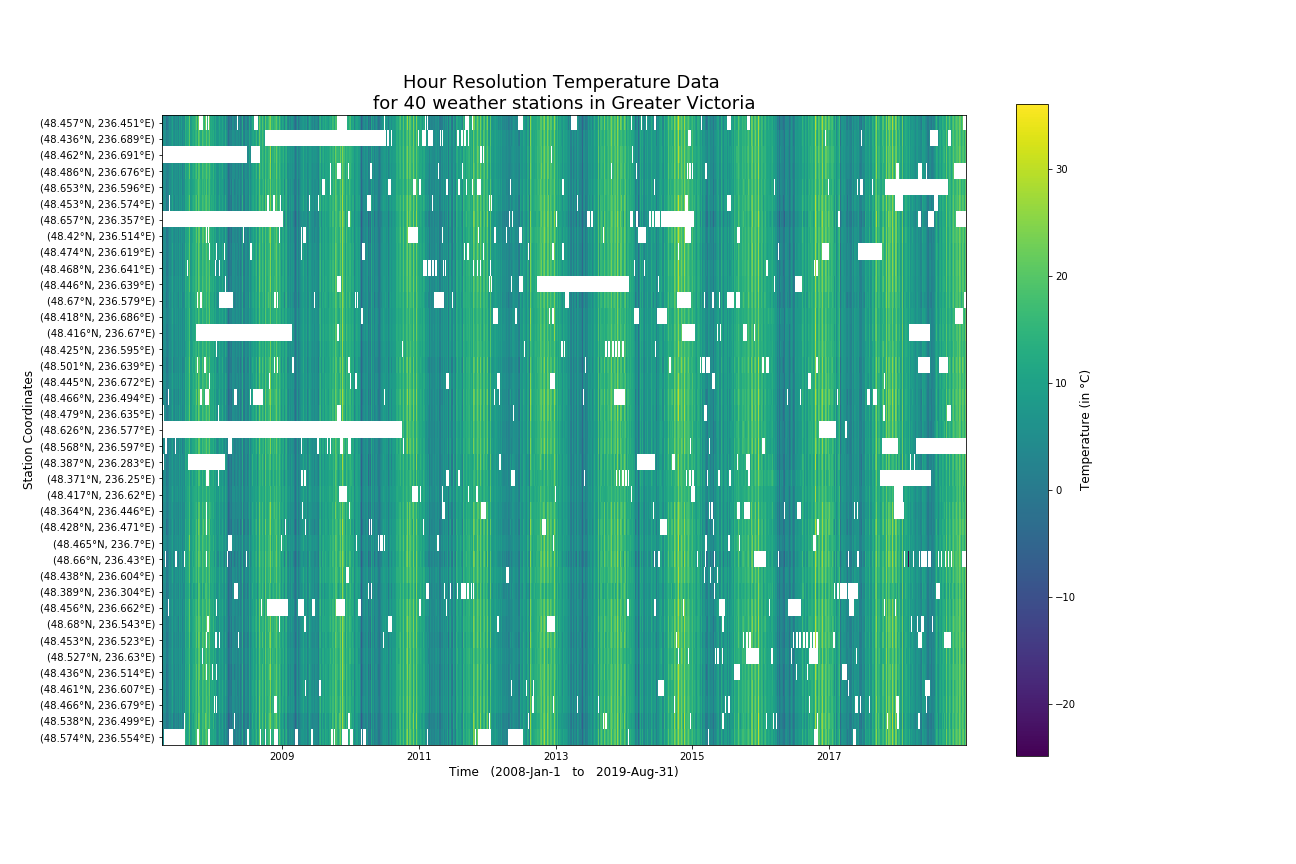

In [10]:
plt.close()

#Sets font size for all plots until specified otherwise
plt.rc('axes', labelsize=12)
plt.rc('axes', titlesize=18)

plt.figure(figsize=(18, 12))
plt.imshow(all_hour_stations, extent=(1, 1.3*len(coordinates), 0, len(coordinates)), interpolation='nearest', origin='lower', cmap='viridis')
plt.xlabel('Time   (2008-Jan-1   to   2019-Aug-31)')
plt.xticks(ticks=hourxlocdate, labels=hourdatelist)
plt.yticks(np.array(range(1, len(coordinates) + 1)) - 0.5, coordinates)
plt.ylabel('Station Coordinates')
plt.title("Hour Resolution Temperature Data \nfor 40 weather stations in Greater Victoria")
cb = plt.colorbar()
cb.set_label("Temperature (in \u00B0C)")

In [11]:
#plt.savefig("/home/jupyter/Phys-411-final-project/Images/RawHourData.eps")
plt.close()

Run code from here.

In [12]:
coastline_coordinates = np.loadtxt("Data/Coastline.dat")

In [13]:
coastline_coordinates = np.transpose(coastline_coordinates)

In [14]:
station_loc_x = 110*np.cos(np.pi*latitudes/180)*(longitudes - 360)
station_loc_y = 110*latitudes

In [15]:
coast_loc_x = 110*np.cos(np.pi*coastline_coordinates[1]/180)*coastline_coordinates[0]
coast_loc_y = 110*coastline_coordinates[1]

In [16]:
scale_factor = np.cos(np.pi*latitudes[10]/180)

<IPython.core.display.Javascript object>


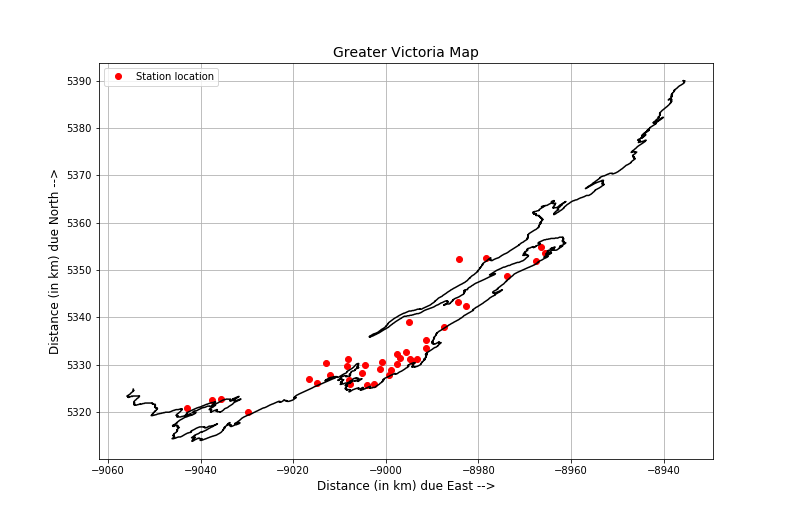

In [17]:
plt.close()

plt.rc('axes', titlesize=14)

plt.figure(figsize=(11, 11*scale_factor))
plt.plot(station_loc_x, station_loc_y, 'ro', label="Station location")
plt.plot(coast_loc_x, coast_loc_y, 'k-')
plt.grid(True)
plt.xlabel("Distance (in km) due East -->")
plt.ylabel("Distance (in km) due North -->")
plt.title("Greater Victoria Map")
plt.legend()

In [18]:
#plt.savefig("/home/jupyter/Phys-411-final-project/Images/GreaterVictoriaMap.eps")
plt.close()

In [19]:
x_gridline = np.linspace(min(station_loc_x), max(station_loc_x), 50)
y_gridline = np.linspace(min(station_loc_y), max(station_loc_y), int(50*scale_factor))

x_grid, y_grid = np.meshgrid(x_gridline, y_gridline)

<IPython.core.display.Javascript object>


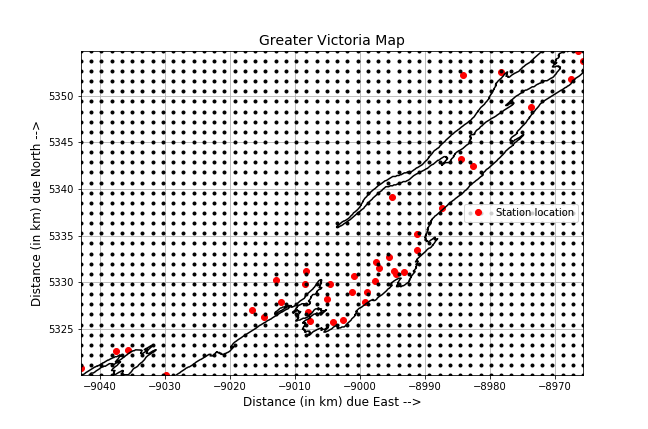

In [20]:
plt.close()

plt.figure(figsize=(9, 9*scale_factor))
plt.plot(station_loc_x, station_loc_y, 'ro', label="Station location")
plt.plot(coast_loc_x, coast_loc_y, 'k-')
plt.plot(x_grid, y_grid, 'k.')
plt.xlim(min(x_gridline), max(x_gridline))
plt.ylim(min(y_gridline), max(y_gridline))
plt.grid(True)
plt.xlabel("Distance (in km) due East -->")
plt.ylabel("Distance (in km) due North -->")
plt.title("Greater Victoria Map")
plt.legend()

In [21]:
plt.close()

## Minute Resolution Data

In [5]:
uvic_sci = np.loadtxt("Data/AllStations_temperature_minute_data_2019/UVicSci_temperature_2019.dat")

In [6]:
min_times = np.linspace(uvic_sci[0], uvic_sci[1], uvic_sci[2])

In [7]:
uvic_sci_min = uvic_sci[3:]

In [13]:
james_bay = np.loadtxt("Data/AllStations_temperature_minute_data_2019/JamesBay_temperature_2019.dat")

In [14]:
james_bay_min = james_bay[3:]

In [8]:
deep_cove = np.loadtxt("Data/AllStations_temperature_minute_data_2019/DeepCove_temperature_2019.dat")

In [9]:
deep_cove_min = deep_cove[3:]

In [32]:
john_muir = np.loadtxt("Data/AllStations_temperature_minute_data_2019/JohnMuir_temperature_2019.dat")

In [33]:
john_muir_min = john_muir[3:]

In [41]:
keating = np.loadtxt("Data/AllStations_temperature_minute_data_2019/Keating_temperature_2019.dat")

In [42]:
keating_min = keating[3:]

In [49]:
helgesen = np.loadtxt("Data/AllStations_temperature_minute_data_2019/Helgesen_temperature_2019.dat")

In [50]:
helgesen_min = helgesen[3:]

In [58]:
discovery_elementary = np.loadtxt("Data/AllStations_temperature_minute_data_2019/DiscoveryElementary_temperature_2019.dat")

In [59]:
discovery_elementary_min = discovery_elementary[3:]

The below code is for the big color plot. Please skip it when repeatedly running code.

In [14]:
min_time_pretty = [epoch + timedelta(days=y-367.0) for y in min_times]

In [15]:
all_min_stations = np.ndarray((7, len(uvic_sci_min)))

In [16]:
all_min_stations[0] = uvic_sci_min #48.462N, 236.691E
all_min_stations[1] = james_bay_min #48.417N, 236.62E
all_min_stations[2] = john_muir_min #48.371N, 236.25E
all_min_stations[3] = deep_cove_min #48.68N, 236.543E
all_min_stations[4] = keating_min #48.568N, 236.597E
all_min_stations[5] = helgesen_min #48.364N, 236.446E
all_min_stations[6] = discovery_elementary_min #48.652N, 236.649E

In [17]:
mindatelist = []
minxlocdate = []
for i in range(1, 6):
    mindatelist.append(str(min_time_pretty[int(i*len(min_times)/6)].year))
    minxlocdate.append(i*1.3*40/6)

In [18]:
minnamelist = ["UVic Science Bldg.\n(48.462\u00B0N, 236.691\u00B0E)", "James Bay\n(48.417\u00B0N, 236.62\u00B0E)", "John Muir\n(48.371\u00B0N, 236.25\u00B0E)", "Deep Cove\n(48.68\u00B0N, 236.543\u00B0E)", "Keating\n(48.568\u00B0N, 236.597\u00B0E)", "Helgesen Elementary\n(48.364\u00B0N, 236.446\u00B0E)", "Discovery Elementary\n(48.652\u00B0N, 236.649\u00B0E)"]

In [22]:
minylocname = []
for i in range(1, 8):
    minylocname.append(i*0.5*40/7 - 0.5*40/18)

<IPython.core.display.Javascript object>


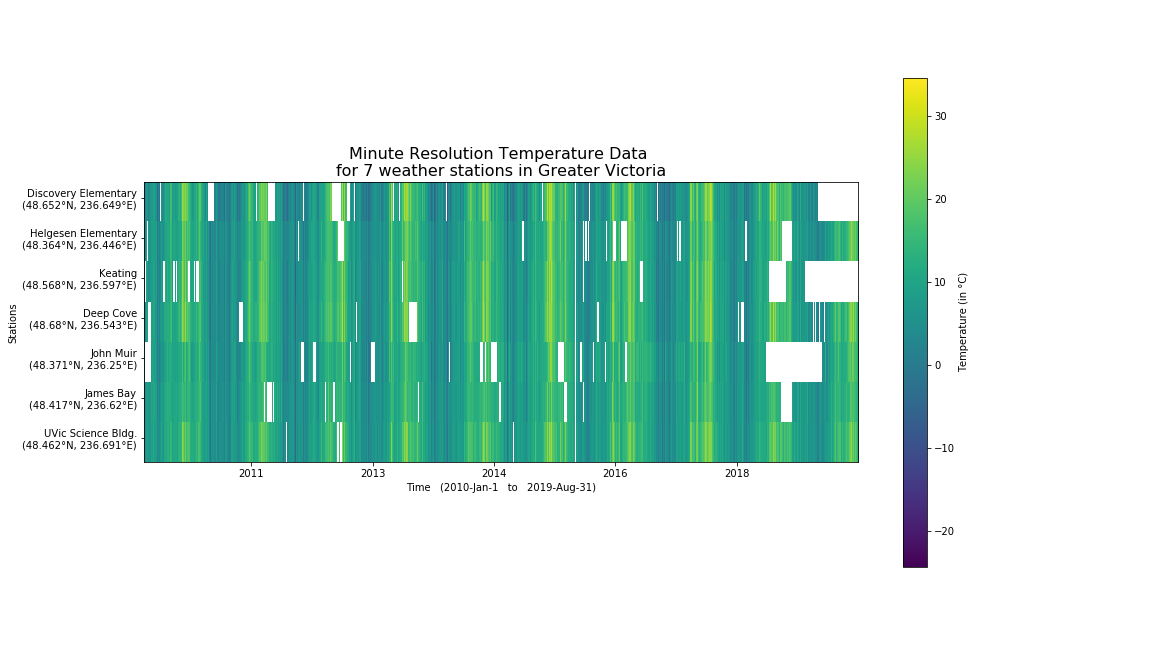

In [23]:
plt.close()
#Sets font size for all plots until specified otherwise
plt.rc('axes', labelsize=10)
plt.rc('axes', titlesize=16)

plt.figure(figsize=(16, 9))
plt.imshow(all_min_stations, extent=(1, 1.3*40, 0, 0.5*40), interpolation='nearest', origin='lower', cmap='viridis')
plt.xticks(ticks=minxlocdate, labels=mindatelist)
plt.yticks(ticks=minylocname, labels=minnamelist)
plt.xlabel('Time   (2010-Jan-1   to   2019-Aug-31)')
plt.ylabel('Stations')
plt.title("Minute Resolution Temperature Data \nfor 7 weather stations in Greater Victoria")
cb = plt.colorbar()
cb.set_label("Temperature (in \u00B0C)")

In [24]:
#plt.savefig("/home/jupyter/Phys-411-final-project/Images/RawMinData.eps")
plt.close()

Run code from here.

In [7]:
fs = 1/60 #Hz; Sampling frequency of minute resolution data
nyq = 0.5*fs #Hz; Nyquist frequency

In [10]:
us_dict = {"Times": min_times, "us": uvic_sci_min}
us_df = pd.DataFrame(us_dict)
us_df_snipped = us_df.dropna()
us_mean = us_df_snipped["us"].mean()
us_var = us_df_snipped["us"].var()

In [11]:
uvic_sci_fn = sci.interp1d(us_df_snipped["Times"], us_df_snipped["us"])

In [27]:
jb_dict = {"Times": min_times, "jb": james_bay_min}
jb_df = pd.DataFrame(jb_dict)
jb_df_snipped = jb_df.dropna()
jb_mean = jb_df_snipped["jb"].mean()
jb_var = jb_df_snipped["jb"].var()

In [28]:
james_bay_fn = sci.interp1d(jb_df_snipped["Times"], jb_df_snipped["jb"])

In [36]:
jm_dict = {"Times": min_times, "jm": john_muir_min}
jm_df = pd.DataFrame(jm_dict)
jm_df_snipped = jm_df.dropna()
jm_mean = jm_df_snipped["jm"].mean()
jm_var = jm_df_snipped["jm"].var()

In [37]:
john_muir_fn = sci.interp1d(jm_df_snipped["Times"], jm_df_snipped["jm"])

In [13]:
dc_dict = {"Times": min_times, "dc": deep_cove_min}
dc_df = pd.DataFrame(dc_dict)
dc_df_snipped = dc_df.dropna()
dc_mean = dc_df_snipped["dc"].mean()
dc_var = dc_df_snipped["dc"].var()

In [14]:
deep_cove_fn = sci.interp1d(dc_df_snipped["Times"], dc_df_snipped["dc"])

In [43]:
kt_dict = {"Times": min_times, "kt": keating_min}
kt_df = pd.DataFrame(kt_dict)
kt_df_snipped = kt_df.dropna()
kt_mean = kt_df_snipped["kt"].mean()
kt_var = kt_df_snipped["kt"].var()

In [44]:
keating_fn = sci.interp1d(kt_df_snipped["Times"], kt_df_snipped["kt"])

In [51]:
hg_dict = {"Times": min_times, "hg": helgesen_min}
hg_df = pd.DataFrame(hg_dict)
hg_df_snipped = hg_df.dropna()
hg_mean = hg_df_snipped["hg"].mean()
hg_var = hg_df_snipped["hg"].var()

In [52]:
helgesen_fn = sci.interp1d(hg_df_snipped["Times"], hg_df_snipped["hg"])

In [ ]:
de_dict = {"Times": min_times, "de": discovery_elementary_min}
de_df = pd.DataFrame(de_dict)
de_df_snipped = de_df.dropna()
de_mean = de_df_snipped["de"].mean()
de_var = de_df_snipped["de"].var()

In [20]:
discovery_elementary_fn = sci.interp1d(de_df_snipped["Times"], de_df_snipped["de"])

From plot, we observe that data after December 2017 or so, ends up having many gaps in it for some of the stations. So only doing analysis from 1-Jan-2011 till 31-Dec-2017.
First, lets compare annual data. For UVic Science Bldg.

In [15]:
datenum_17_1_1 = 736696.0 - 2.0
datenum_16_1_1 = datenum_17_1_1 - 366
datenum_15_1_1 = datenum_16_1_1 - 365
datenum_14_1_1 = datenum_15_1_1 - 365
datenum_13_1_1 = datenum_14_1_1 - 365
datenum_12_1_1 = datenum_13_1_1 - 366
datenum_11_1_1 = datenum_12_1_1 - 365
datenum_10_1_1 = datenum_11_1_1 - 365

In [11]:
yr2017 = np.linspace(datenum_17_1_1, datenum_17_1_1 + 365, 60*24*365 + 1)
yr2016 = np.linspace(datenum_16_1_1, datenum_16_1_1 + 366, 60*24*366 + 1)
yr2015 = np.linspace(datenum_15_1_1, datenum_15_1_1 + 365, 60*24*365 + 1)
yr2014 = np.linspace(datenum_14_1_1, datenum_14_1_1 + 365, 60*24*365 + 1)
yr2013 = np.linspace(datenum_13_1_1, datenum_13_1_1 + 365, 60*24*365 + 1)
yr2012 = np.linspace(datenum_12_1_1, datenum_12_1_1 + 366, 60*24*366 + 1)
yr2011 = np.linspace(datenum_11_1_1, datenum_11_1_1 + 365, 60*24*365 + 1)
yr2010 = np.linspace(datenum_10_1_1 + 2, datenum_10_1_1 + 365, 60*24*363 + 1)

In [12]:
temp_us_17 = uvic_sci_fn(yr2017)
temp_us_16 = uvic_sci_fn(yr2016)
temp_us_15 = uvic_sci_fn(yr2015)
temp_us_14 = uvic_sci_fn(yr2014)
temp_us_13 = uvic_sci_fn(yr2013)
temp_us_12 = uvic_sci_fn(yr2012)
temp_us_11 = uvic_sci_fn(yr2011)
temp_us_10 = uvic_sci_fn(yr2010)

In [13]:
f_us_17, PSD_us_17 = signal.welch(temp_us_17, fs, 'flattop', len(yr2017), scaling='spectrum')
f_us_16, PSD_us_16 = signal.welch(temp_us_16, fs, 'flattop', len(yr2016), scaling='spectrum')
f_us_15, PSD_us_15 = signal.welch(temp_us_15, fs, 'flattop', len(yr2015), scaling='spectrum')
f_us_14, PSD_us_14 = signal.welch(temp_us_14, fs, 'flattop', len(yr2014), scaling='spectrum')
f_us_13, PSD_us_13 = signal.welch(temp_us_13, fs, 'flattop', len(yr2013), scaling='spectrum')
f_us_12, PSD_us_12 = signal.welch(temp_us_12, fs, 'flattop', len(yr2012), scaling='spectrum')
f_us_11, PSD_us_11 = signal.welch(temp_us_11, fs, 'flattop', len(yr2011), scaling='spectrum')
f_us_10, PSD_us_10 = signal.welch(temp_us_10, fs, 'flattop', len(yr2010), scaling='spectrum')

In [14]:
yr2017_pretty = [epoch + timedelta(days=x-367.0) for x in yr2017]
yr2016_pretty = [epoch + timedelta(days=x-367.0) for x in yr2016]
yr2015_pretty = [epoch + timedelta(days=x-367.0) for x in yr2015]
yr2014_pretty = [epoch + timedelta(days=x-367.0) for x in yr2014]
yr2013_pretty = [epoch + timedelta(days=x-367.0) for x in yr2013]
yr2012_pretty = [epoch + timedelta(days=x-367.0) for x in yr2012]
yr2011_pretty = [epoch + timedelta(days=x-367.0) for x in yr2011]
yr2010_pretty = [epoch + timedelta(days=x-367.0) for x in yr2010]

<IPython.core.display.Javascript object>


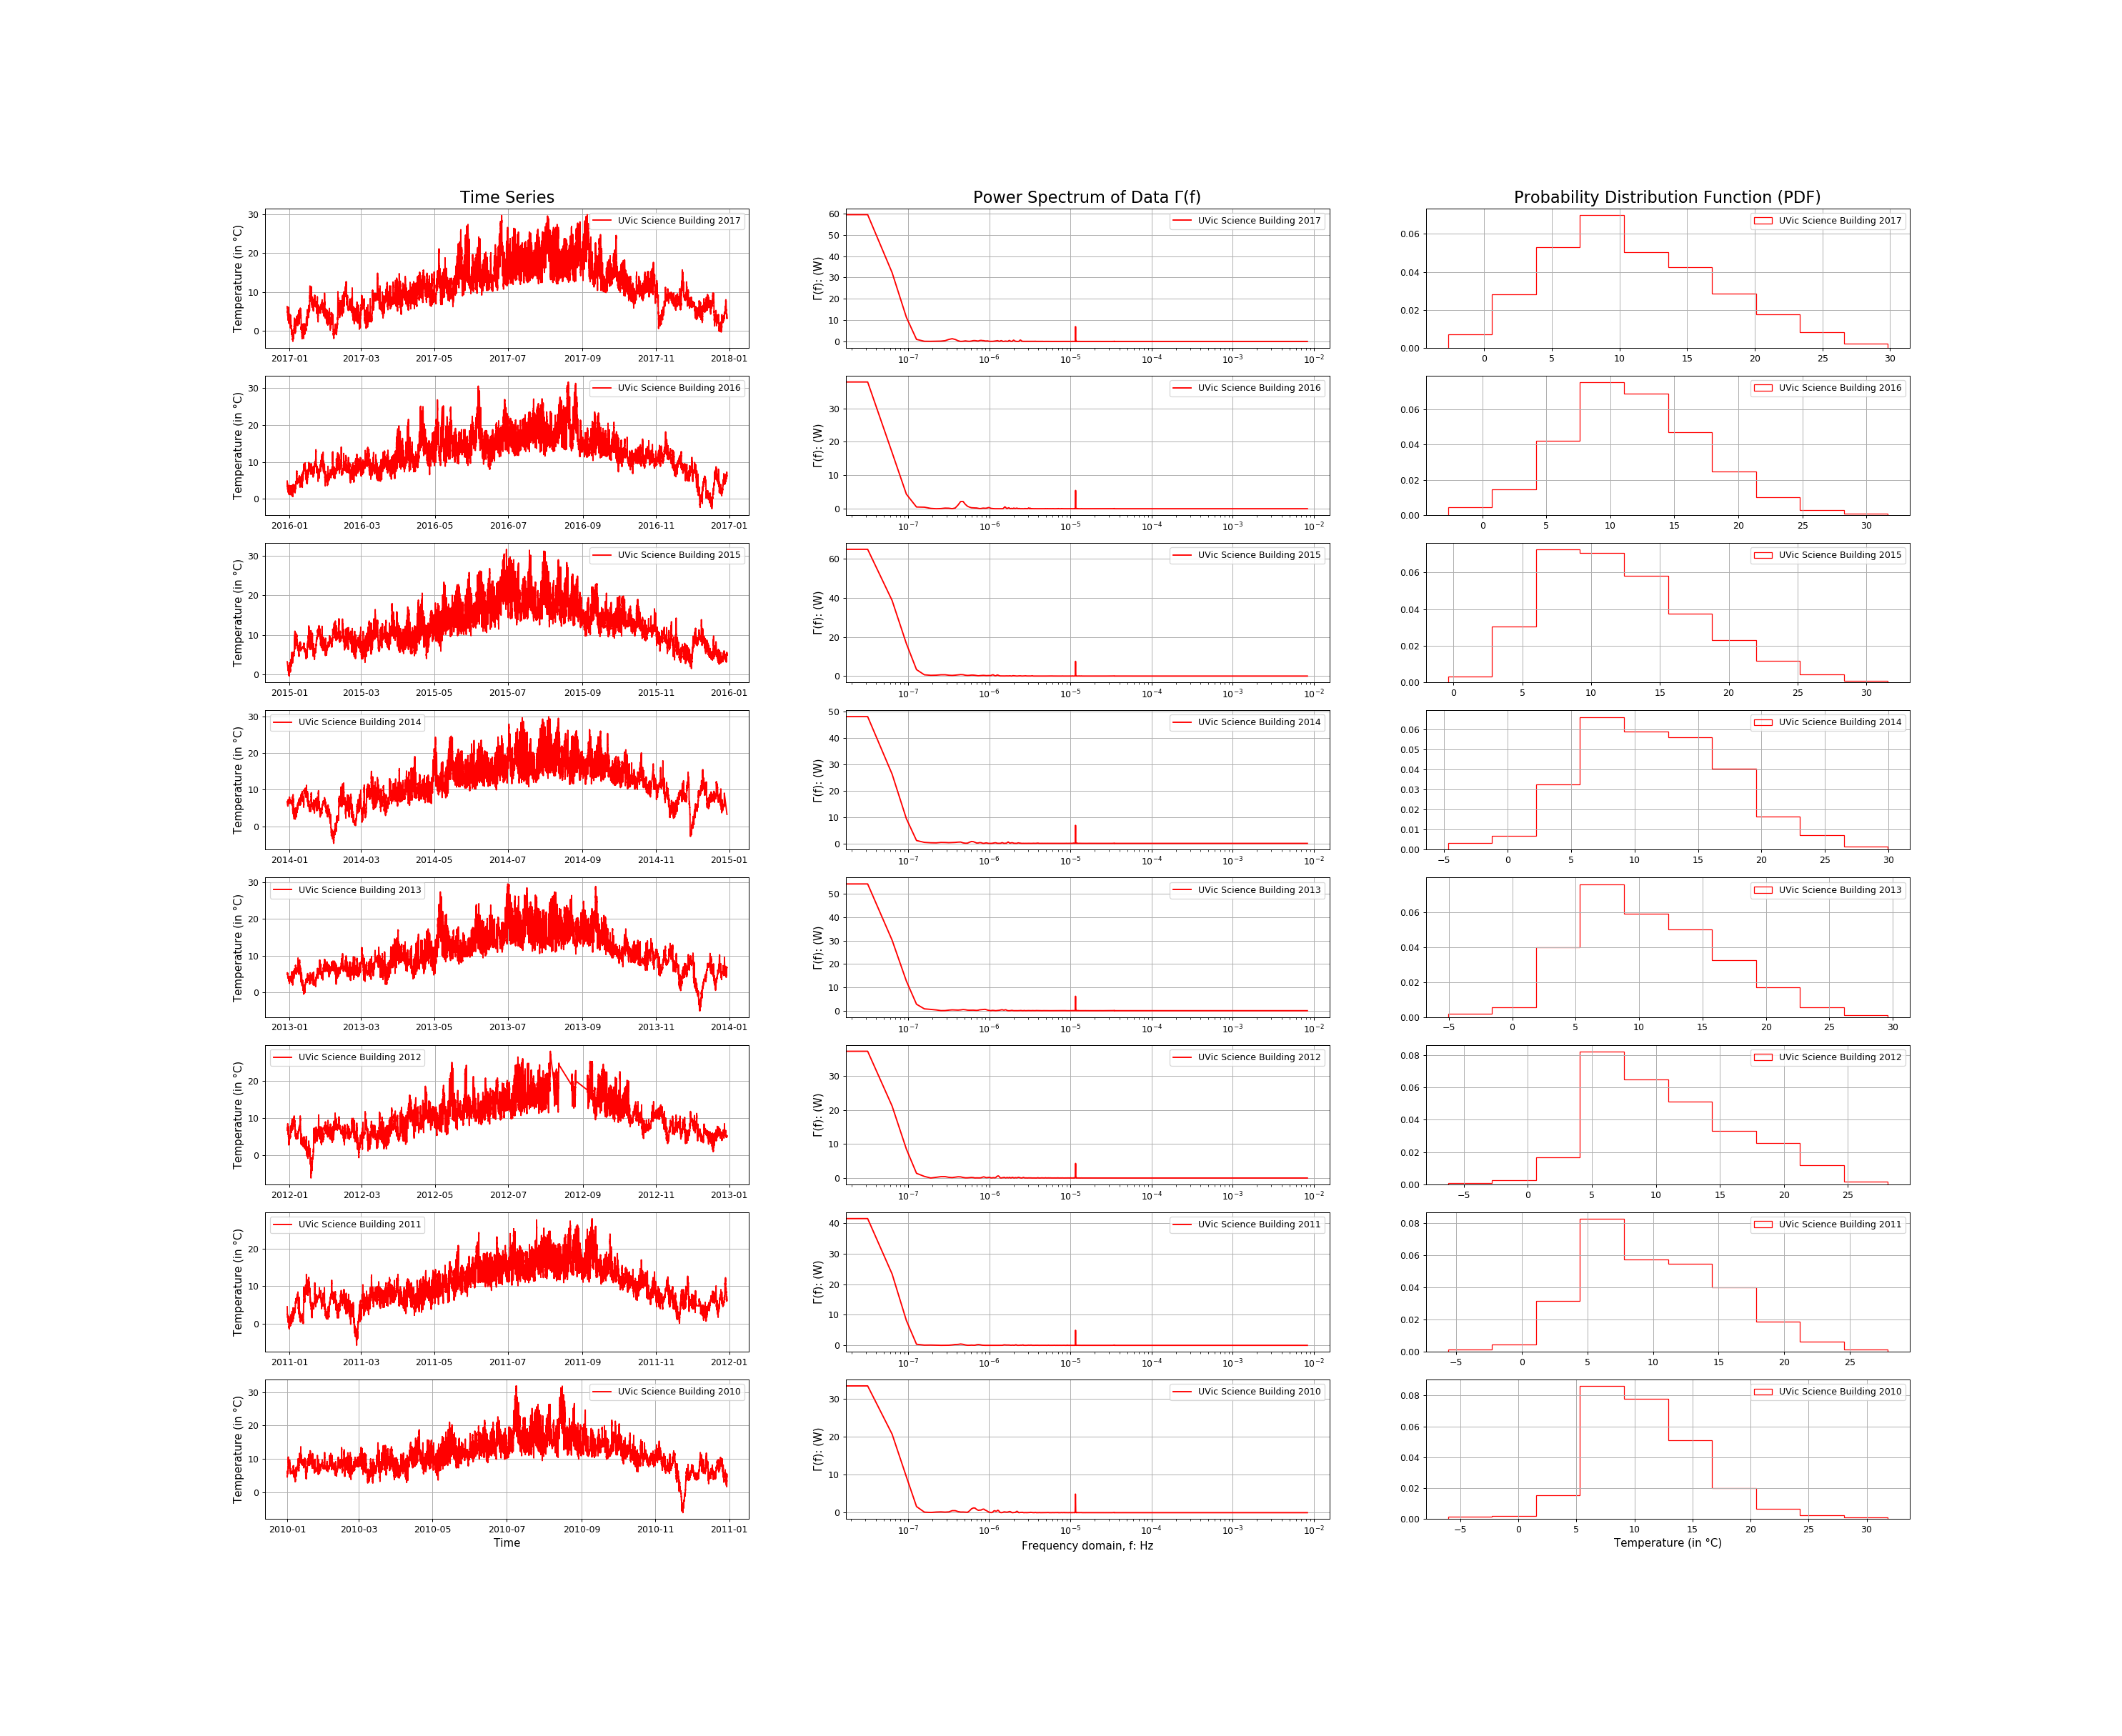

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:50: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:51: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:52: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:53: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/opt/

Text(0.5, 1.0, 'Probability Distribution Function (PDF)')

In [22]:
plt.close()

plt.rc('axes', labelsize=12)
plt.rc('axes', titlesize=18)

fig = plt.figure(figsize=(33, 27))

ax1 = plt.subplot2grid((8,3), (0,0))
ax2 = plt.subplot2grid((8,3), (0,1))
ax3 = plt.subplot2grid((8,3), (1,0))
ax4 = plt.subplot2grid((8,3), (1,1))
ax5 = plt.subplot2grid((8,3), (2,0))
ax6 = plt.subplot2grid((8,3), (2,1))
ax7 = plt.subplot2grid((8,3), (3,0))
ax8 = plt.subplot2grid((8,3), (3,1))
ax9 = plt.subplot2grid((8,3), (4,0))
ax10 = plt.subplot2grid((8,3), (4,1))
ax11 = plt.subplot2grid((8,3), (5,0))
ax12 = plt.subplot2grid((8,3), (5,1))
ax13 = plt.subplot2grid((8,3), (6,0))
ax14 = plt.subplot2grid((8,3), (6,1))
ax15 = plt.subplot2grid((8,3), (7,0))
ax16 = plt.subplot2grid((8,3), (7,1))
ax17 = plt.subplot2grid((8,3), (0,2))
ax18 = plt.subplot2grid((8,3), (1,2))
ax19 = plt.subplot2grid((8,3), (2,2))
ax20 = plt.subplot2grid((8,3), (3,2))
ax21 = plt.subplot2grid((8,3), (4,2))
ax22 = plt.subplot2grid((8,3), (5,2))
ax23 = plt.subplot2grid((8,3), (6,2))
ax24 = plt.subplot2grid((8,3), (7,2))

ax1.plot(yr2017_pretty, temp_us_17, 'r-', label="UVic Science Building 2017")
ax3.plot(yr2016_pretty, temp_us_16, 'r-', label="UVic Science Building 2016")
ax5.plot(yr2015_pretty, temp_us_15, 'r-', label="UVic Science Building 2015")
ax7.plot(yr2014_pretty, temp_us_14, 'r-', label="UVic Science Building 2014")
ax9.plot(yr2013_pretty, temp_us_13, 'r-', label="UVic Science Building 2013")
ax11.plot(yr2012_pretty, temp_us_12, 'r-', label="UVic Science Building 2012")
ax13.plot(yr2011_pretty, temp_us_11, 'r-', label="UVic Science Building 2011")
ax15.plot(yr2010_pretty, temp_us_10, 'r-', label="UVic Science Building 2010")
ax2.semilogx(f_us_17, PSD_us_17, 'r-', label="UVic Science Building 2017")
ax4.semilogx(f_us_16, PSD_us_16, 'r-', label="UVic Science Building 2016")
ax6.semilogx(f_us_15, PSD_us_15, 'r-', label="UVic Science Building 2015")
ax8.semilogx(f_us_14, PSD_us_14, 'r-', label="UVic Science Building 2014")
ax10.semilogx(f_us_13, PSD_us_13, 'r-', label="UVic Science Building 2013")
ax12.semilogx(f_us_12, PSD_us_12, 'r-', label="UVic Science Building 2012")
ax14.semilogx(f_us_11, PSD_us_11, 'r-', label="UVic Science Building 2011")
ax16.semilogx(f_us_10, PSD_us_10, 'r-', label="UVic Science Building 2010")
ax17.hist(temp_us_17, histtype='step', color='red', normed=True, label="UVic Science Building 2017")
ax18.hist(temp_us_16, histtype='step', color='red', normed=True, label="UVic Science Building 2016")
ax19.hist(temp_us_15, histtype='step', color='red', normed=True, label="UVic Science Building 2015")
ax20.hist(temp_us_14, histtype='step', color='red', normed=True, label="UVic Science Building 2014")
ax21.hist(temp_us_13, histtype='step', color='red', normed=True, label="UVic Science Building 2013")
ax22.hist(temp_us_12, histtype='step', color='red', normed=True, label="UVic Science Building 2012")
ax23.hist(temp_us_11, histtype='step', color='red', normed=True, label="UVic Science Building 2011")
ax24.hist(temp_us_10, histtype='step', color='red', normed=True, label="UVic Science Building 2010")

ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)
ax5.grid(True)
ax6.grid(True)
ax7.grid(True)
ax8.grid(True)
ax9.grid(True)
ax10.grid(True)
ax11.grid(True)
ax12.grid(True)
ax13.grid(True)
ax14.grid(True)
ax15.grid(True)
ax16.grid(True)
ax17.grid(True)
ax18.grid(True)
ax19.grid(True)
ax20.grid(True)
ax21.grid(True)
ax22.grid(True)
ax23.grid(True)
ax24.grid(True)

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
ax6.legend()
ax7.legend()
ax8.legend()
ax9.legend()
ax10.legend()
ax11.legend()
ax12.legend()
ax13.legend()
ax14.legend()
ax15.legend()
ax16.legend()
ax17.legend()
ax18.legend()
ax19.legend()
ax20.legend()
ax21.legend()
ax22.legend()
ax23.legend()
ax24.legend()

ax15.set_xlabel("Time")
ax16.set_xlabel("Frequency domain, f: Hz")
ax24.set_xlabel("Temperature (in \u00B0C)")

ax1.set_ylabel("Temperature (in \u00B0C)")
ax2.set_ylabel("\u0393(f): (W)")
ax3.set_ylabel("Temperature (in \u00B0C)")
ax4.set_ylabel("\u0393(f): (W)")
ax5.set_ylabel("Temperature (in \u00B0C)")
ax6.set_ylabel("\u0393(f): (W)")
ax7.set_ylabel("Temperature (in \u00B0C)")
ax8.set_ylabel("\u0393(f): (W)")
ax9.set_ylabel("Temperature (in \u00B0C)")
ax10.set_ylabel("\u0393(f): (W)")
ax11.set_ylabel("Temperature (in \u00B0C)")
ax12.set_ylabel("\u0393(f): (W)")
ax13.set_ylabel("Temperature (in \u00B0C)")
ax14.set_ylabel("\u0393(f): (W)")
ax15.set_ylabel("Temperature (in \u00B0C)")
ax16.set_ylabel("\u0393(f): (W)")

ax1.set_title("Time Series")
ax2.set_title("Power Spectrum of Data \u0393(f)")
ax17.set_title("Probability Distribution Function (PDF)")

In [24]:
#plt.savefig("/home/jupyter/Phys-411-final-project/Images/UVicSciAnnualData.eps")
plt.close()

In [18]:
lowest_us_temp = [min(temp_us_10), min(temp_us_11), min(temp_us_12), min(temp_us_13), min(temp_us_14), min(temp_us_15), min(temp_us_16), min(temp_us_17)]
highest_us_temp = [max(temp_us_10), max(temp_us_11), max(temp_us_12), max(temp_us_13), max(temp_us_14), max(temp_us_15), max(temp_us_16), max(temp_us_17)]
mean_us_temp = [sum(temp_us_10)/len(temp_us_10), sum(temp_us_11)/len(temp_us_11), sum(temp_us_12)/len(temp_us_12), sum(temp_us_13)/len(temp_us_13), sum(temp_us_14)/len(temp_us_14), sum(temp_us_15)/len(temp_us_15), sum(temp_us_16)/len(temp_us_16), sum(temp_us_17)/len(temp_us_17)]

In [19]:
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

<IPython.core.display.Javascript object>


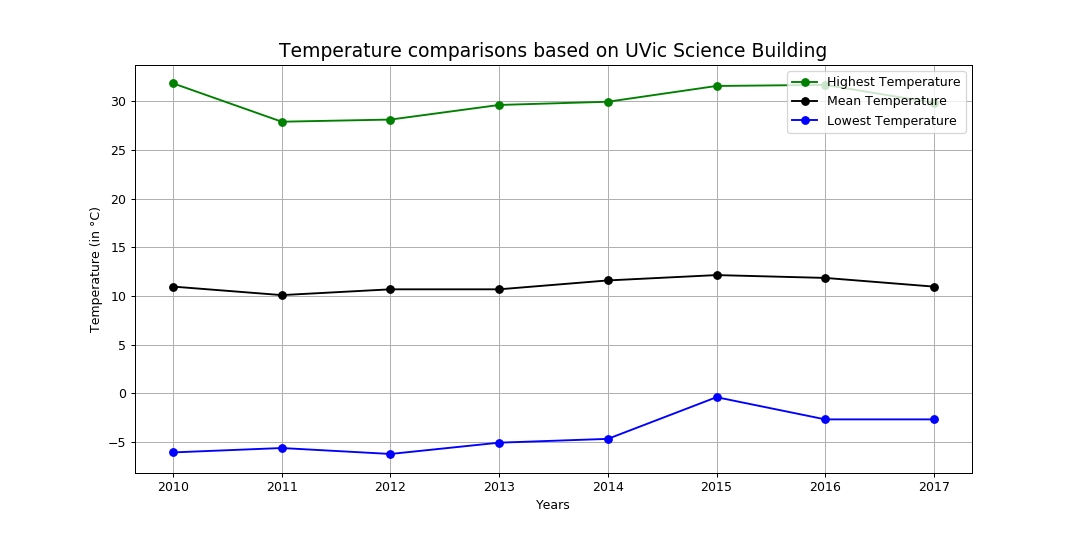

Text(0.5, 1.0, 'Temperature comparisons based on UVic Science Building')

In [20]:
plt.figure(figsize=(12, 6))

plt.rc('axes', labelsize=10)
plt.rc('axes', titlesize=15)

plt.plot(years, highest_us_temp, 'go-', label='Highest Temperature')
plt.plot(years, mean_us_temp, 'ko-', label='Mean Temperature')
plt.plot(years, lowest_us_temp, 'bo-', label='Lowest Temperature')
plt.grid(True)
plt.legend()
plt.ylabel("Temperature (in \u00B0C)")
plt.xlabel("Years")
plt.title("Temperature comparisons based on UVic Science Building")

In [21]:
#plt.savefig("/home/jupyter/Phys-411-final-project/Images/TempComparison.eps")
plt.close()

In [16]:
corr_time_stamps = np.linspace(datenum_10_1_1+2, datenum_17_1_1 + 365, 7*24*365 + 1)
N = len(corr_time_stamps)

In [17]:
loc_us = np.array([110*np.cos(np.pi*48.462/180)*(236.691 - 360), 110*48.462])

In [18]:
temp_us = uvic_sci_fn(corr_time_stamps)

In [29]:
corr_time_utc = np.linespace(datenum_17_1_1+71.45833, datenum_17_1_1+309.45833, 7*24*365 + 1) #Choosing dates March 12th - November 5th 2017
temp_us_utc = uvic_sci_fn(corr_time_utc)
temp_us_hr = uvic_sci_hr_fn(corr_time_utc - 8)  #UTC = PST + 8 hours (above range chosen specifically to match it)

us_utc_mean = sum(temp_us_utc)/len(temp_us_utc)
us_hr_utc_mean = sum(temp_us_hr)/len(temp_us_hr)

In [21]:
loc_jb = np.array([110*np.cos(np.pi*48.417/180)*(236.62 - 360), 110*48.417])

In [26]:
temp_jb = james_bay_fn(corr_time_stamps)

In [34]:
loc_jm = np.array([110*np.cos(np.pi*48.371/180)*(236.25 - 360), 110*48.371])

In [38]:
temp_jm = john_muir_fn(corr_time_stamps)

In [19]:
loc_dc = np.array([110*np.cos(np.pi*48.68/180)*(236.543 - 360), 110*48.68])

In [20]:
temp_dc = deep_cove_fn(corr_time_stamps)

In [45]:
loc_kt = np.array([110*np.cos(np.pi*48.568/180)*(236.597 - 360), 110*48.568])

In [46]:
temp_kt = keating_fn(corr_time_stamps)

In [53]:
loc_hg = np.array([110*np.cos(np.pi*48.364/180)*(236.446 - 360), 110*48.364])

In [54]:
temp_hg = helgesen_fn(corr_time_stamps)

In [23]:
loc_de = np.array([110*np.cos(np.pi*48.652/180)*(236.649 - 360), 110*48.652])

In [ ]:
temp_de = discovery_elementary_fn(corr_time_stamps)

In [30]:
add0 = sum((temp_us_utc - us_utc_mean)*(temp_us_hr - us_hr_utc_mean))
#print(add0)
correlation_self = add0/(N - 1)/np.sqrt(us_var*us_hr_var)

In [31]:
correlation_self

0.8292033739535017

In [27]:
add1 = sum((temp_us - us_mean)*(temp_jb - jb_mean))
#print(add1)
correlation_jb = add1/(N - 1)/np.sqrt(us_var*jb_var)

In [28]:
correlation_jb

0.9320265527966303

In [39]:
add2 = sum((temp_us - us_mean)*(temp_jm - jm_mean))
#print(add2)
correlation_jm = add2/(N - 1)/np.sqrt(us_var*jm_var)

In [40]:
correlation_jm

0.8962797504294047

In [21]:
add3 = sum((temp_us - us_mean)*(temp_dc - dc_mean))
#print(add3)
correlation_dc = add3/(N - 1)/np.sqrt(us_var*dc_var)

In [22]:
correlation_dc

0.9568481304237885

In [47]:
add4 = sum((temp_us - us_mean)*(temp_kt - kt_mean))
#print(add4)
correlation_kt = add4/(N - 1)/np.sqrt(us_var*kt_var)

In [48]:
correlation_kt

0.9752346056030579

In [56]:
add5 = sum((temp_us - us_mean)*(temp_hg - hg_mean))
#print(add5)
correlation_hg = add5/(N - 1)/np.sqrt(us_var*hg_var)

In [57]:
correlation_hg

0.9712726414473524

In [ ]:
add6 = sum((temp_us - us_mean)*(temp_de - de_mean))
#print(add6)
correlation_de = add1/(N - 1)/np.sqrt(us_var*de_var)

In [ ]:
correlation_de

Find distance between UVic Science building and all these other buildings. Also, compare with auto_correlation... comparing UVic Science building hour data.
Plot correlation vs. distance.

After this, do a global interpolation (coz no spikes and quicker) of hour data. Do it for Summer and Winter for years 2011-2017.

In [ ]:
def distance(array1, array2): 
    return [np.sqrt((array1[0] - array2[0])**2 + (array1[1] - array2[1])**2), array1[0] - array2[0], array1[1] - array2[1]]

In [ ]:
minnamelist = ["UVic Science Bldg.\n(48.462\u00B0N, 236.691\u00B0E)", "James Bay\n(48.417\u00B0N, 236.62\u00B0E)", "John Muir\n(48.371\u00B0N, 236.25\u00B0E)", "Deep Cove\n(48.68\u00B0N, 236.543\u00B0E)", "Keating\n(48.568\u00B0N, 236.597\u00B0E)", "Helgesen Elementary\n(48.364\u00B0N, 236.446\u00B0E)", "Discovery Elementary\n(48.652\u00B0N, 236.649\u00B0E)"]

In [ ]:
correlations = [0.8292033739535017, 0.9320265527966303, 0.8962797504294047, 0.9568481304237885, 0.9752346056030579, 0.9712726414473524, ...]
distances = [distance(loc_us, loc_us), distance(loc_us, loc_jb), distance(loc_us, loc_jm), distance(loc_us, loc_dc), distance(loc_us, loc_kt), distance(loc_us, loc_hg), distance(loc_us, loc_de)]
colours = ['red', 'navy', 'green', 'pink', 'cyan', 'purple', 'brown']

In [ ]:
plt.figure(figsize(12, 10))
for i in range(len(colours)):
    plt.plot(distances[i][0], correlations[i], color=colours[i], marker='o', label=minnamelist[i])
    plt.plot(distances[i][1], correlations[i], color=colours[i], marker='>')
    plt.plot(distances[i][2], correlations[i], color=colours[i], marker='^')
plt.plot(0, 0, 'k>', label="W->E")
plt.plot(0, 0, 'k^', label="S->N")
plt.plot(0, 0, 'ko', label="Absolute")
plt.legend()
plt.grid(True)
plt.xlabel("Distances (in km) w.r.t. UVic Science Building")
plt.ylabel("Correlations")
plt.title("How is temperature correlated with distance?")

In [ ]:
plt.savefig("/home/jupyter/Phys-411-final-project/Images/Correlations.eps")
plt.close()